```{index} UN Sustainable Development Goals (UN SDG)
```

# Introduction

The dataset used in the exercises for this section is from a citizen science project. It consists of 40067 text excerpts labeled with 16 United Nations Sustainable Development Goals (UN SDG) categories and can be found at https://zenodo.org/record/7540165#.ZAF10uzMKfU. As of now, all the exercises use the 2023.01 version of the dataset, which is the version used when designing the exercises and the content for this section. Please be aware that the data file format has gone through significant changes since the first version, 2021.09.

The UN SDG framework is a UN 2030 thematic framework for world development. Adopted in 2015, it has 17 comprehensive goals, with 169 targets and 232 indicators. The UN SDGs are universal, being accepted and adopted by countries all over the globe, and represents a proxy of an ideal future. 

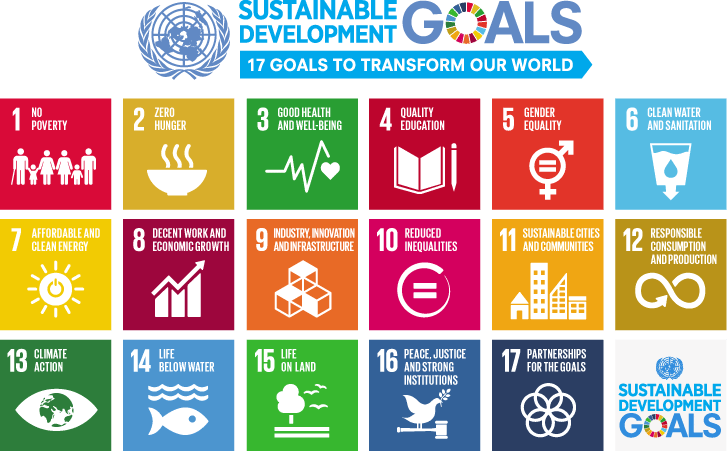

In [7]:
from IPython.display import Image
Image(filename='images/unsdg.png')

Each text in the dataset has been labeled with a corresponding SDG and then shown to volunteers, who were asked to evaluate whether or not they thought the SDG was a good match for the text.

We recommend creating a [new Python environment](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) for this section; you can do this in the terminal by running the following code chunk:

In [ ]:
conda deactivate 
conda create -n nlp
conda activate nlp
conda install -c conda-forge spacy
conda install -c conda-forge scikit-learn
conda install ipykernel
conda install seaborn
conda install nltk

The libraries for this section include
`pandas`,
`scikit-learn`, 
`nltk`, 
`spaCy`, and 
`tensorflow`, as well as some sub-packages in these libraries.
Code to import the necessary libraries will be provided in each section. For example, the following code imports the `pandas` library.

In [3]:
import pandas as pd

Most importantly, it is necessary to download the full dataset and put it in a directory you can access. At the beginning of each section, you should modify the first code cell to use this directory:

In [4]:
# change this to your own data directory
data_dir = "data/"

We can then load the dataset and examine the first few rows as follows:

In [8]:
text_file_name = "osdg-community-data-v2023-01-01.csv"
text_df = pd.read_csv(data_dir + text_file_name,sep = "\t",  quotechar='"')
col_names = text_df.columns.values[0].split('\t')
text_df[col_names] = text_df[text_df.columns.values[0]].apply(lambda x: pd.Series(str(x).split("\t")))
text_df = text_df.astype({'sdg':int, 'labels_negative': int, 'labels_positive':int, 'agreement': float}, copy=True)
text_df.drop(text_df.columns.values[0], axis=1, inplace=True)
text_df.head()

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"""From a gender perspective, Paulgaard points o...",5,1,8,0.777778
1,10.18356/eca72908-en,00028349a7f9b2485ff344ae44ccfd6b,Labour legislation regulates maximum working h...,11,2,1,0.333333
2,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,8,0.777778
3,10.1787/5k9b7bn5qzvd-en,0006a887475ccfa5a7f5f51d4ac83d02,The extent to which they are akin to corruptio...,3,1,2,0.333333
4,10.1787/9789264258211-6-en,0006d6e7593776abbdf4a6f985ea6d95,A region reporting a higher rate will not earn...,3,2,2,0.000000


The features of the dataset that are relevant for our purposes are as follows:
- `text` - an excerpt from the document
- `sdg` - the SDG assigned to the text
- `labels_negative` - the number of volunteers who thought that the assigned SDG did not match the text
- `labels_positive` - the number of volunteers who thought that the assigned SDG did match the text
- `agreement` - agreement score, calculated as $agreement=\frac{|labels_{positive}−labels_{negative}|}{labels_{positive}+labels_{negative}}$

As the sample entries above show, the SDGs in the dataset are denoted by numbers. For more human-readable names and definitions of the SDGs, you can [download the file `sdg_names_definitions.csv` from the repository](https://raw.githubusercontent.com/timothyprojectGiG/JB_Math_Textbook/main/src/Advanced/AdvDataAnalysis/data/sdg_names_definitions.csv). Put this file in the same data directory as the dataset.

In [11]:
file_name = "sdg_names_definitions.csv"
sdg_names = pd.read_csv(data_dir + file_name)
sdg_names.head()

,sdg,sdg_name,sdg_definition
0,1,No Poverty,End poverty in all its forms everywhere
1,2,Zero Hunger,"End hunger, achieve food security and improved..."
2,3,Good Health and Well Being,Ensure healthy lives and promote well-being fo...
3,4,Quality Education,Ensure inclusive and equitable quality educati...
4,5,Gender Equality,Achieve gender equality and empower all women ...


This provides the framework for the rest of the examples and exercises we will use throughout this section.